# 主要研究域名的bigram是否具有特征

In [1]:
import matplotlib.pyplot as plt

from utils import *


# 加载数据,使用示例数据来测试bigram能否体现dga的特征
# 使用示例数据为的是减少检测时间（使用sklearn的kmeans来看是否能够聚类成两个不同的域,cpu运算，速度较慢）
filename = 'dataset/dga_domains_sample.csv'
file_dataframe = read_file(filename)
# 1表示DGA域名 0表示正常合法域名
file_dataframe.head()

,Domain,Label
0,cvyh1po636avyrsxebwbkn7,1
1,plasticbags,0
2,mzltrack,0
3,miss-slim,0
4,txumyqrubwutbb,1


In [2]:
# 数据向量化
list_Domain = file_dataframe['Domain'].tolist()
list_Label = file_dataframe['Label'].tolist()

# 计算合法域名和DGA域名
list_B = [] # benign
list_M = [] # malignant
for i in range(len(list_Domain)):
    if list_Label[i] == 0:
        for j in list_Domain[i]:
            list_B.append(j)
    else:
        for j in list_Domain[i]:
            list_M.append(j)

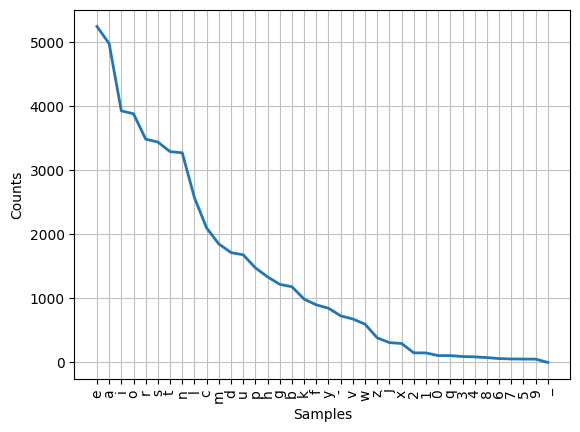

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [3]:
# 观察良性与DGA域名字母出现的次数
import nltk
freq_DGA = nltk.FreqDist(list_M)
freq_Leg = nltk.FreqDist(list_B)
freq_Leg.plot()


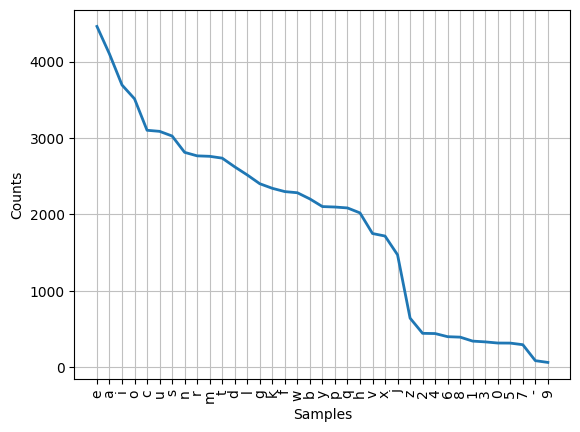

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [4]:
freq_DGA.plot()

In [5]:
# 生成Bigram
Bigram_Data = []

for i in range(len(list_Domain)):
    var = []
    for j in range(len(list_Domain[i]) - 1):
        var.append(list_Domain[i][j] + list_Domain[i][j + 1])
    Bigram_Data.append(var)


Bigram_D = []


for i in range(len(list_Domain)):
    for j in range(len(list_Domain[i]) - 1):
        var = list_Domain[i][j] + list_Domain[i][j + 1]
        Bigram_D.append(var)


# 使用nltk统计bigram出现的次数

freq_dist_Data = nltk.FreqDist(Bigram_D)
freq_dist_Data

FreqDist({'er': 1144, 'in': 1127, 'an': 971, 're': 902, 'ar': 829, 'es': 829, 'on': 791, 'te': 756, 'en': 731, 'st': 675, ...})

In [6]:
# 用bigram出现的频率替换为数字
def data_to_vector(freq_dist, Bigram_list, list_Label):
    # 使用构造好的字典对域名进行处理
    list_data = [[freq_dist[y] for y in x] for x in Bigram_list]
    max_data_len = len(max(Bigram_list, key=len, default=''))
    # 以里面域名最大长度构造特征，小于最大长度的用0填充
    data_vector = sequence.pad_sequences(list_data, maxlen=max_data_len)
    # 将标签列表转化为ndarray
    list_label = np.array(list_Label)
    return data_vector, list_label

data_vector, list_label = data_to_vector(freq_dist_Data, Bigram_Data, list_Label)
data_vector

array([[  0,   0,   0, ...,  75,  91,  11],
       [  0,   0,   0, ..., 335, 263, 120],
       [  0,   0,   0, ..., 631, 455, 233],
       ...,
       [  0,   0,   0, ...,  70, 217,  79],
       [  0,   0,   0, ..., 385, 392, 574],
       [  0,   0,   0, ...,  79, 198, 389]])

In [7]:
# 使用PCA对数据进行降维
from sklearn.decomposition import PCA
pca = PCA(2)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_vector = scaler.fit_transform(pca.fit_transform(data_vector))
type(data_vector)

numpy.ndarray

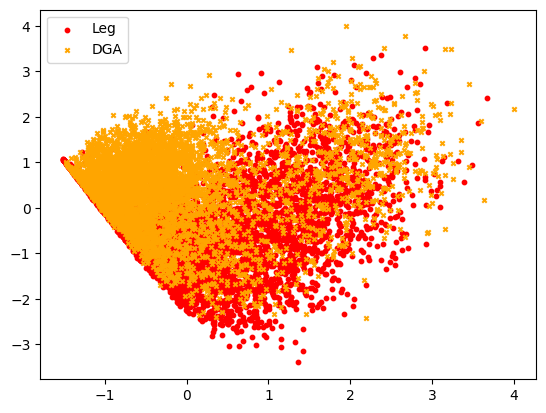

In [8]:
# 展示数据

for i in range(2):
    if i == 0:
        s1 = plt.scatter(x=data_vector[list_label==i, 0], y=data_vector[list_label==i, 1]
             ,marker='o'
             ,s=10
             ,c='r'
        )
    elif i ==1:
        s2 = plt.scatter(data_vector[list_label==i, 0],data_vector[list_label==i, 1]
             ,marker='x'
             ,s=10
             ,c='orange'
        )
plt.legend((s1, s2), ('Leg','DGA'),loc='best')


In [9]:
# 使用k-means 进行聚类
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++')
y_pred = kmeans.fit_predict(data_vector)

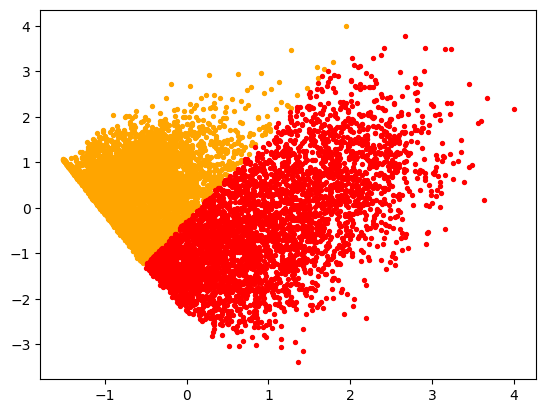

In [11]:
color = ["orange","red"]
fig, ax1 = plt.subplots(1)
for i in range(2):
    ax1.scatter(data_vector[y_pred==i, 0], data_vector[y_pred==i, 1]
     ,marker='o'
     ,s=8
     ,c=color[i]
     )

plt.show()
